In [ ]:
"""3. Konwolucyjna sieć neuronowa (ziarno losowości = 42).
3.1. Przekształcenie danych do macierzy 3D (rozmiar + informacja o kanale koloru) -> 28 x 28 x 1.
3.2. Prosta sieć CNN składająca się z jednej warstwy konwolucyjnej z filtrem 3×3, a następnie maksymalizującą warstwą łączącą. Następnie dane wejściowe muszą zostać spłaszczone i przepuszczone przez warstwę gęstą.
	3.2.1. Model sekwencyjny:
		- Pierwsza warstwa konwolucyjna: zawiera 64 filtry 5x5, która korzysta z funkcji aktywacji ReLU, parametry obrazu -> input_shape = [28,28,1],
		- Maksymalizująca warstwa łącząca zawierającą jądro o rozmiarze domyślnym 2,
		- Warstwa porzucenia dla 20% połączeń,
		- Warstwa spłaszczona,
		- Warstwa ukryta gęsta składająca się z 128 jednostek, która korzysta z funkcji aktywacji ReLU,
		- Warstwa wyjściowa gęsta (Dense) składająca się z 10 jednostek z wyznaczoną funkcją aktywacji softmax.
3.3. Jaka jest liczba parametrów w poszczególnych warstwach modelu?
3.4. Kompilowanie modelu:
	- funkcja straty: sparse_categorical_crossentropy, 
	- optymalizator: adam,
	- wskaźnik: accuracy.
3.5. Trenowanie modelu:
	- cechy wejściowe,
	- klasy docelowe, 
	- liczba epok równa 50,
	- przebieg walidacyjny,
	- callbacks (monitorowane będą zmiany funkcji straty dla zbioru walidacyjnego a liczba epok, po ilu zatrzyma się model to minimum 3 epoki).
3.6. Krzywe uczenia dla modelu:
	3.6.1. Jak zmienia się dokładność dla zbioru uczącego i walidacyjnego w miarę uczenia?
	3.6.2. Jak na początku treningu sprawował się model?
	3.6.3. Jak zmienia się wartość błędu walidacyjnego?
	3.6.4. Czy model uzyskał zbieżność?
3.7. Ewaluacja modelu.
3.8. Predykcja modelu.
3.9. Raport z klasyfikacji i macierz błędów dla modelu. Jaka jest dokładność modelu? Dla której klasy wskaźniki jakości klasyfikacji są najwyższe? Jaka jest liczba fałszywie pozytywnych i fałszywie negatywnych predykcji dla tej klasy? Dla której klasy wskaźniki jakości klasyfikacji są najniższe? Jaka jest liczba fałszywie pozytywnych i fałszywie negatywnych predykcji dla tej klasy?
3.10. Wyświetlenie kilkunastu obrazów z etykietami i predykcją etykiet ze zbioru testowego, które zostały nieprawidłowo sklasyfikowane."""

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Wczytanie zbioru danych MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Wyodrębnienie 5000 obrazów ze zbioru treningowego do walidacji
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=5000, random_state=42)

In [4]:
# Ustawienie ziarna losowości
np.random.seed(42)

# 3.1 Przekształcenie danych do macierzy 3D
x_train_cnn = np.expand_dims(x_train, axis=-1)
x_val_cnn = np.expand_dims(x_val, axis=-1)
x_test_cnn = np.expand_dims(x_test, axis=-1)

In [19]:
# Przekształcenie danych do macierzy 3D
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val_cnn = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [20]:
# Model sekwencyjny
model_cnn = Sequential()
model_cnn.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D())
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

In [21]:
# Liczba parametrów w poszczególnych warstwach
print("Liczba parametrów w poszczególnych warstwach:")
model_cnn.summary()

Liczba parametrów w poszczególnych warstwach:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
        

In [22]:
# Kompilacja modelu
model_cnn.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [23]:
# Trenowanie modelu z callbacks
history_cnn = model_cnn.fit(x_train_cnn, y_train, epochs=50, validation_data=(x_val_cnn, y_val),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/50
1719/1719 [==============================] - 39s 22ms/step - loss: 0.6326 - accuracy: 0.9389 - val_loss: 0.0879 - val_accuracy: 0.9738
Epoch 2/50
1719/1719 [==============================] - 37s 22ms/step - loss: 0.0822 - accuracy: 0.9763 - val_loss: 0.0769 - val_accuracy: 0.9792
Epoch 3/50
1719/1719 [==============================] - 37s 22ms/step - loss: 0.0721 - accuracy: 0.9797 - val_loss: 0.0909 - val_accuracy: 0.9764
Epoch 4/50
1719/1719 [==============================] - 37s 21ms/step - loss: 0.0647 - accuracy: 0.9812 - val_loss: 0.1044 - val_accuracy: 0.9748
Epoch 5/50
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0556 - accuracy: 0.9842 - val_loss: 0.0831 - val_accuracy: 0.9784


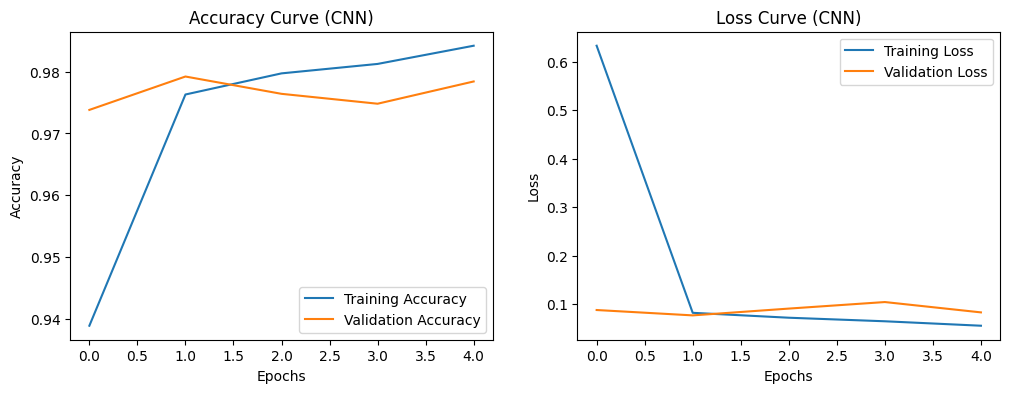

In [24]:
# Krzywe uczenia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
# Ewaluacja modelu
eval_result_cnn = model_cnn.evaluate(x_test_cnn, y_test)
print("\nEwaluacja modelu:")
print(f"Test Loss: {eval_result_cnn[0]}, Test Accuracy: {eval_result_cnn[1]}")

313/313 [==============================] - 2s 7ms/step - loss: 0.0802 - accuracy: 0.9809

Ewaluacja modelu:
Test Loss: 0.08023364841938019, Test Accuracy: 0.98089998960495


In [26]:
# Predykcja modelu
predictions_cnn = model_cnn.predict(x_test_cnn)

313/313 [==============================] - 2s 5ms/step


In [27]:
# Raport z klasyfikacji i macierz błędów
y_pred_cnn = np.argmax(predictions_cnn, axis=1)
print("\nRaport z klasyfikacji:")
print(classification_report(y_test, y_pred_cnn))

print("\nMacierz błędów:")
print(confusion_matrix(y_test, y_pred_cnn))


Raport z klasyfikacji:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Macierz błędów:
[[ 974    0    1    1    0    1    1    0    2    0]
 [   0 1129    1    0    0    0    1    1    3    0]
 [   1    7 1016    1    2    0    2    2    1    0]
 [   0    1    5  990    0    3    0    1

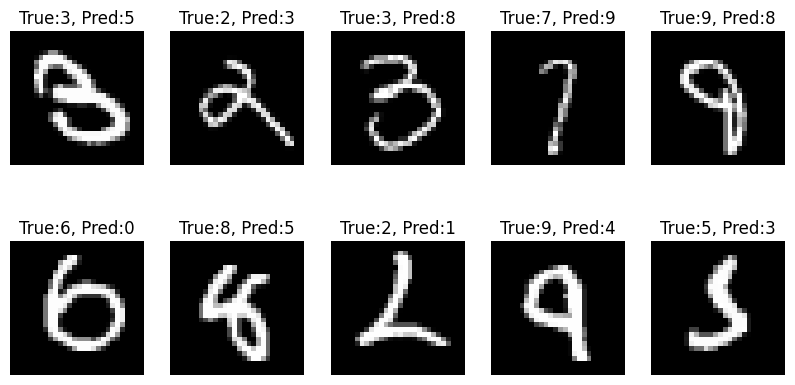

In [31]:
# Nieprawidłowo sklasyfikowane obrazy ze zbioru testowego
misclassified_indices_cnn = np.where(y_pred_cnn != y_test)[0]

plt.figure(figsize=(10, 5))
for i, index in enumerate(misclassified_indices_cnn[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index], cmap='gray')  # Wyświetlenie obrazu (3D do 2D)
    plt.title(f"True:{y_test[index]}, Pred:{y_pred_cnn[index]}")
    plt.axis('off')

plt.show()

NameError: name 'model' is not defined